In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)
import datetime
print(pd.__version__)

1.3.4


# Tìm 10 kệ hàng (aisle) bán được nhiều nhất
# Thực Hiện Trên File `order_products__prior.csv`
### (>33 triệu dòng)

**Download data:** https://drive.google.com/file/d/1I93JznGUeIZ7FkoidlI1Sfedn_go3nqt/view?usp=sharing

# 1. Load dữ liệu

**Load thử các chunk**<br>
(Chỉ cần cột `product_id`)

In [3]:
N = 1e6
filepath = 'data-instacart/order_products__prior.csv'
order_products = pd.read_csv(filepath, chunksize=N, usecols=['product_id'])
i = 0
for chunk in order_products:
    i+=1
    print(f"Lần đọc {i}:",chunk.shape)

Lần đọc 1: (1000000, 1)
Lần đọc 2: (1000000, 1)
Lần đọc 3: (1000000, 1)
Lần đọc 4: (1000000, 1)
Lần đọc 5: (1000000, 1)
Lần đọc 6: (1000000, 1)
Lần đọc 7: (1000000, 1)
Lần đọc 8: (1000000, 1)
Lần đọc 9: (1000000, 1)
Lần đọc 10: (1000000, 1)
Lần đọc 11: (1000000, 1)
Lần đọc 12: (1000000, 1)
Lần đọc 13: (1000000, 1)
Lần đọc 14: (1000000, 1)
Lần đọc 15: (1000000, 1)
Lần đọc 16: (1000000, 1)
Lần đọc 17: (1000000, 1)
Lần đọc 18: (1000000, 1)
Lần đọc 19: (1000000, 1)
Lần đọc 20: (1000000, 1)
Lần đọc 21: (1000000, 1)
Lần đọc 22: (1000000, 1)
Lần đọc 23: (1000000, 1)
Lần đọc 24: (1000000, 1)
Lần đọc 25: (1000000, 1)
Lần đọc 26: (1000000, 1)
Lần đọc 27: (1000000, 1)
Lần đọc 28: (1000000, 1)
Lần đọc 29: (1000000, 1)
Lần đọc 30: (1000000, 1)
Lần đọc 31: (1000000, 1)
Lần đọc 32: (1000000, 1)
Lần đọc 33: (434489, 1)


**Load sẵn dữ liệu về tên sản phẩm**

In [4]:
product_info = pd.read_csv('data-instacart/products.csv')
product_info.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
product_aisle = product_info[['product_id', 'aisle_id']]
product_aisle

,product_id,aisle_id
0,1,61
1,2,104
2,3,94
3,4,38
4,5,5
...,...,...
49683,49684,124
49684,49685,42
49685,49686,112
49686,49687,41


# 2. Xử lý từng chunk và ghép kết quả

**Hàm xử lý từng chunk**

In [6]:
# Hàm lọc ra số lần aisle xuất hiện ở mỗi chunk
def Select_Aisle_ID(chunk):
    order_aisle = pd.merge(chunk, product_aisle, on='product_id')['aisle_id']
    aisle_count = order_aisle.value_counts().reset_index()
    aisle_count.columns = ['aisle_id', 'counts']
    
    return aisle_count    

**Thực hiện cho tất cả các chunk**

In [7]:
# Phải tiến hành đọc lại
order_products = pd.read_csv(filepath, chunksize=N, usecols=['product_id'])

In [8]:
# Xử lý từng chunk và đưa vào danh sách kết quả
ket_qua = []

start = datetime.datetime.now()
for i, chunk in enumerate(order_products):
    print("Chunk: ", i)
    chunk_count = Select_Aisle_ID(chunk)
    ket_qua.append(chunk_count)

end = datetime.datetime.now()
print(f"Hoàn tất cho {i+1} chunk. Thời gian:", end-start)

Chunk:  0
Chunk:  1
Chunk:  2
Chunk:  3
Chunk:  4
Chunk:  5
Chunk:  6
Chunk:  7
Chunk:  8
Chunk:  9
Chunk:  10
Chunk:  11
Chunk:  12
Chunk:  13
Chunk:  14
Chunk:  15
Chunk:  16
Chunk:  17
Chunk:  18
Chunk:  19
Chunk:  20
Chunk:  21
Chunk:  22
Chunk:  23
Chunk:  24
Chunk:  25
Chunk:  26
Chunk:  27
Chunk:  28
Chunk:  29
Chunk:  30
Chunk:  31
Chunk:  32
Hoàn tất cho 33 chunk. Thời gian: 0:00:07.402748


**Ghép kết quả thành một DataFrame**

In [9]:
total_aisle_count = pd.concat(ket_qua)
print(total_aisle_count.shape)

(4422, 2)


**Sử dụng groupby để tổng hợp kết quả**

In [10]:
total_aisle_count = total_aisle_count.groupby('aisle_id').sum().reset_index()
total_aisle_count

,aisle_id,counts
0,1,71928
1,2,82491
2,3,456386
3,4,200687
4,5,62510
...,...,...
129,130,158164
130,131,266637
131,132,6168
132,133,18683


# 3. Lấy ra 10 Aisle và vẽ biểu đồ

**Dùng hàm nlargest chọn ra 10 dòng có số đếm lớn nhất**

In [11]:
n_aisle_id = total_aisle_count.nlargest(10, columns='counts')
n_aisle_id

,aisle_id,counts
23,24,3642188
82,83,3418021
122,123,1765313
119,120,1452343
20,21,979763
83,84,891015
114,115,841533
106,107,722470
90,91,638253
111,112,584834


**Thử vẽ lên biểu đồ**

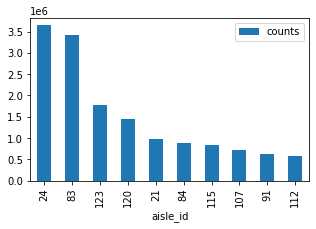

In [12]:
n_aisle_id.plot.bar(x='aisle_id', y='counts', figsize=(5,3))
plt.show()
plt.close('all')

**Lấy ra tên các aisle trong file `aisles.csv`**

In [13]:
aisle_info = pd.read_csv('data-instacart/aisles.csv')
aisle_info.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
n_aisle_name = pd.merge(n_aisle_id, aisle_info, on='aisle_id')
n_aisle_name

,aisle_id,counts,aisle
0,24,3642188,fresh fruits
1,83,3418021,fresh vegetables
2,123,1765313,packaged vegetables fruits
3,120,1452343,yogurt
4,21,979763,packaged cheese
5,84,891015,milk
6,115,841533,water seltzer sparkling water
7,107,722470,chips pretzels
8,91,638253,soy lactosefree
9,112,584834,bread


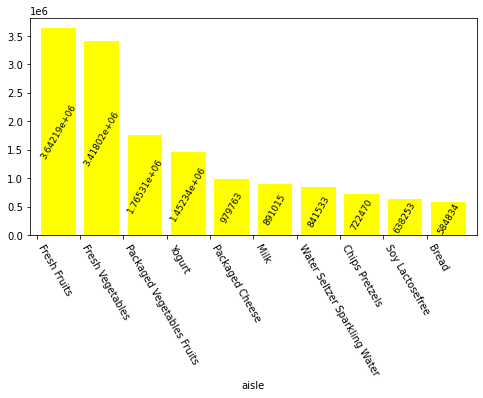

In [15]:
ax = n_aisle_name.plot.bar(x='aisle', y='counts', width=0.8, figsize=(8,4), 
                           color='yellow', legend=None, rot=-60)
ax.bar_label(container=ax.containers[0], label_type='center', fontsize=9, rotation=60)
ax.set_xticks(n_aisle_name.index-0.5)
ax.set_xticklabels(n_aisle_name['aisle'].str.title(), ha='left')
plt.show()
plt.close('all')

In [ ]:
# .str.title(): chữ cái đầu viết hoa